# Scikit-learn

## Creazione di training set e test set
Ci troviamo nel caso supervisionato.

Abbiamo un dataset labellato che presenta la colonna target che è quella che vogliamo predire e un insieme di feature.

Il metodo “classico” prevede di dividere i dati in due gruppi, uno per eseguire il training del modello e uno per testarlo.

In Scikit questo può essere fatto con la classe `sklearn.model_selection.train_test_split(X, y, test_size=0.25, train_size=1-test_size, random_state=None, stratify=None)` dove i parametri sono:
*	X: matrice (dataframe) delle feature;
*	y: colonna (serie) contenente le label;
*	test_size: percentuale di dati che si vuole nel test set espressa come un numero decimale da 0 a 1. Di default è il 25%;
*	train_size: percentuale di dati che si vuole nel training set. Di default è 1-test_size.
*	random_state: i dati vengono divisi in modo randomico, quindi esecuzioni diverse porteranno a train/test set diversi. Se si vuole impedirlo e quindi rendere tutto pseudocasuale, bisogna impostare un valore numerico in questo parametro.
*	Stratify: se impostato uguale a y (quindi bisogna passare la colonna delle label) crea i train/test set con lo stesso rapporto tra le label presente nei dati originali. Questo è utile quando si allena un classificatore e si vuole garantire che tutte le classi siano rappresentate all’interno del training set.
La classe ritorna quattro elementi in questo ordine: X_train, X_test, y_train, y_test dove:
*	X_train, y_train: sono i dati per allenare il modello, X le feature e y le label;
*	X_test, y_test: sono i dati per testare il modello. X_test le feature su cui il modello deve fare la predizione, e y_test le label con cui confrontare la predizione e valutare le performance.


## Modelli
In generale, tutti i modelli predittivi contenuti in Scikit implementano due metodi principali:
*	train(X_train, y_train): allena il modello. X_train e y_train si sono ottenuti come descritto in precedenza;
*	predict(X_test) esegue una predizione utilizzando il modello allenato (quindi prima è necessario eseguire train).


### Regressione
Vediamo un esempio di regressione.

Per la regressione lineare si può usare il modello implementato dalla classe `sklearn.linear_model.LinearRegression`, indipendentemente dal tipo di regressione si può usare la classe `sklearn.tree.DecisionTreeRegressor` che utilizza dei decision tree per stimare valori numerici e quindi è indipendente dal tipo di relazione che esiste tra i dati.

Carichiamo il dataset healthexp di Seaborn che per diverse nazioni, annualità e soldi spesi in sanità, fornisce l’aspettativa di vita media.


In [2]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


Visto che il modello può lavorare solo con valori numerici dobbiamo convertire country, visto che non esiste un ordine tra le varie nazioni, convertiamolo con la codifica one-hot-encoding.

In [3]:
df1 = pd.get_dummies(df, columns=['Country'], drop_first=True)
df1.head()

,Year,Spending_USD,Life_Expectancy,Country_France,Country_Germany,Country_Great Britain,Country_Japan,Country_USA
0,1970,252.311,70.6,False,True,False,False,False
1,1970,192.143,72.2,True,False,False,False,False
2,1970,123.993,71.9,False,False,True,False,False
3,1970,150.437,72.0,False,False,False,True,False
4,1970,326.961,70.9,False,False,False,False,True


Dividiamo quindi i dati in train e test

In [4]:
from sklearn.model_selection import train_test_split

X = df1.drop('Life_Expectancy', axis=1)
y = df1['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ora possiamo applicare direttamente la regressione lineare su questi dati, il modello imparerà l’equazione di una retta che stima al meglio sulla base di X il valore di y.

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

La retta avrà equazione $y_{pred} = mX+c$ i coefficienti moltiplicativi m calcolati nel modello allenato si possono sono contenuti all’interno della proprietà con `coef_` mentre il valore dell’intercetta c nella proprietà `intercept_`.

Quindi quello che fa il modello è prendere i valori di X

In [19]:
X.head(1)

,Year,Spending_USD,Country_France,Country_Germany,Country_Great Britain,Country_Japan,Country_USA
0,1970,252.311,False,True,False,False,False


Moltiplicarli per i coefficienti *m* e aggiungere la costante *c*

In [20]:
print(lr.coef_)
print(lr.intercept_)

[ 2.89737686e-01 -6.35299849e-04 -1.34187164e-02 -1.04773289e+00
 -1.62529282e+00  1.22409406e+00 -8.70646292e-01]
-498.52720108325116


Ottenendo così il valore predetto

In [21]:
import numpy as np
np.dot(X.head(1).values[0], lr.coef_) + lr.intercept_

np.float64(71.04801442866824)

Questo era quello reale

In [23]:
y.head(1)

,Life_Expectancy
0,70.6


#### Verificare efficacia regressione

Una volta addestrato il modello, dobbiamo verificare come sono le sue performance.

Le metriche in Scikit sono contenute nel pacchetto sklearn.metrics ogni metrica prende in ingresso l’array dei valori reali e quello dei valori predetti e restituisce il risultato.


Per la regressione si può utilizzare l’errore quadratico medio (RMSE).
Questa metrica in scikit è contenuta nel metodo `sklearn.metrics.root_mean_squared_error(y_test, y_pred)` che prende in ingresso l’array dei valori reali e quello dei valori predetti e restituisce l’RMSE.


Nel nostro caso ritorna 0.37, quindi il modello predice l’aspettativa di vita con un errore medio di 0.37 anni

In [25]:
from sklearn.metrics import root_mean_squared_error

y_pred = lr.predict(X_test)
root_mean_squared_error(y_test, y_pred)

0.3711181543679717

Un’altra metrica che si può usare per valutare la regressione lineare è il coefficiente di determinazione R2, è una misura statistica che varia nel range 0, 1 e indica quanto bene un modello di regressione si adatta ai dati osservati.
Più il valore è vicino a 1 migliore è il modello.

In Scikit si trova nel metodo `sklearn.metrics.r2_score(y_test, y_pred)`.

Nel nostro caso otteniamo R2=0.988, che indica che il modello si adatta molto bene ai dati (ovviamente è un esempio molto semplice).


In [26]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9887186991451886

## Classificazione

Vediamo un esempio di classificazione.
Usiamo il dataset iris di seaborn che contiene informazioni sulla morfologia dei fiori di tre specie di Iris, l’obiettivo è determinare la specie dalle informazioni morfologiche.

In questo caso utilizziamo un decision tree, in scikit lo troviamo nella classe `sklearn.tree.DecisionTreeClassifier(random_state=None, max_depth=None)`, altri parametri possono essere trovati nella documentazione.
* random_state implica di scegliere le feature sempre nello stesso modo, garantendo una ripetibilità nell’esecuzione.
* max_depth consente di limitare l’altezza dell’albero, se non è impostato l’albero si estenderà finché nelle foglie non ci saranno record di una sola classe (nodi puri), questo può causare overfitting e se si verifica si può intervenire impostando questo parametro. In questo modo una volta raggiunta l’altezza massima l’albero si interromperà e i record in quel gruppo saranno labellati sulla base della classe contenuta di più in quel nodo.


Possiamo dividere i dati in train e test, allenare il classificatore e fare la predizione.

In [27]:
from sklearn.tree import DecisionTreeClassifier

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Possiamo quindi dividere i dati in train e test, allenare il classificatore e fare la predizione.

In [32]:
X = df.drop('species', axis=1).copy()
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dt = DecisionTreeClassifier(random_state=50)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

Verificare efficacia classificazione

Per la classificazione le metriche più usate sono:
*	Accuracy: contenuta in `sklearn.metrics.accuracy_score`
*	Recall: `sklearn.metrics.recall_score`
*	Precision: `sklearn.metrics.precision_score`

Recall e precision prendono in ingresso anche un ulteriore parametro `average` che specifica come calcolarle nel caso in cui vi siano problemi di classificazione con più di due classi (non binari) come il nostro caso. `Average` può essere impostato a:
  *	micro:  calcola la recall/precision contando globalmente TP, FN e FP.
  *	macro: calcola le metriche classe per classe e poi fa una media dei valori. Quindi nel nostro caso calcolerà recall/precision per virginica, setosa, versicolor e poi farà la media. Questa metrica non tiene conto del numero di elementi di una classe, che potrebbero essere sbilanciati (classi più numerose di altre).
  *	weighted: calcola le metriche classe per classe e poi fa una media pesata dei valori tenendo conto di quanti elementi ci sono per ogni classe.


Calcoliamo le metriche.

Otteniamo praticamente 0.97 per tutte e tre.
In questo caso il modello sta performando bene (è sempre un esempio “giocattolo”).


In [33]:
from sklearn.metrics import accuracy_score, recall_score, precision_score


print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average='macro'))
print(precision_score(y_test, y_pred, average='macro'))


0.9666666666666667
0.9666666666666667
0.9696969696969697


Volendo vedere dove sbaglia possiamo calcolare la confusion matrix con `sklearn.metrics.confusion_matrix` e visualizzarla con la classe `sklearn.metrics`.`ConfusionMatrixDisplay(confusion_matrix, display_labels=None)` dove il primo parametro è la confusion matrix generata con il primo metodo e il secondo sono le label da visualizzare che possono essere prese dalla proprietà classes_ del classificatore.

Una volta istanziata la classe, si può visualizzare la confusion matrix con il metodo `.plot()`


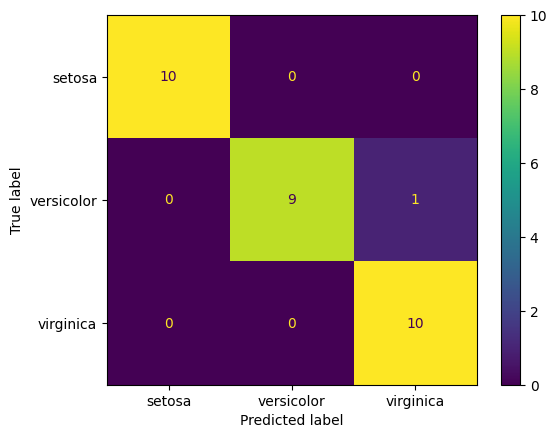

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=dt.classes_).plot()

## Cross validation

Siccome i dati sono pochi, potremmo utilizzare la cross validation per vedere come performa il modello di classificazione (ma si può fare anche con regressione) in media su tutti i dati.

La cross validation può essere applicata su di un modello con il metodo `sklearn.model_selection.cross_val_score(model, X, y, cv=5, scoring=None)` dove
*	model: è il modello da valutare;
*	X: è l’insieme di feature;
*	y: è l’array di label;
*	cv: è il numero di fold che si vuole creare, in quante parti dividere il dataset. Di default è 5.
*	scoring: è il nome della funzione che si vuole utilizzare per valutare il modello. Le funzioni disponibili possono essere trovate qui https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-string-names

Il metodo restituisce un array di score calcolati con la scoring function, la dimensione dell’array è pari a cv.


In questo caso di ottengono tre valori molto simili uguali a 0.95, però si può vedere come le performance medie del modello siano un po’ più basse sull’intero insieme dei dati piuttosto che su un singolo split.

Quando si hanno pochi dati a disposizione o comunque si vuole valutare come performa un modello sull’intero set di dati a disposizione è bene usare la cross validation.

In [37]:
from sklearn.model_selection import cross_val_score
import statistics as st

dt = DecisionTreeClassifier(random_state=42)
ac_m = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
rec_m = cross_val_score(dt, X, y, cv=5, scoring='recall_macro')
prec_m = cross_val_score(dt, X, y, cv=5, scoring='precision_macro')

print(f"Accuracy media {st.mean(ac_m)}")
print(f"Recall media {st.mean(rec_m)}")
print(f"Precision media {st.mean(prec_m)}")

Accuracy media 0.9533333333333334
Recall media 0.9533333333333334
Precision media 0.955016835016835


### Random forest

Un altro modello molto utilizzato per la classificazione è il random forest. Questo modello allena diversi decision tree su feature scelte in modo randomico, dopodiché assegna la label sulla base della maggioranza.

Ad esempio, se 2 alberi dicono che un record di iris è virginica mentre uno dice che è versicolor allora il record sarà classificato come virginica.


Questo modello si trova nella classe `sklearn.ensemble.RandomForestClassifier`.


Se lo proviamo con lo stesso setting di un singolo decision tree, possiamo vedere come le performance siano migliori, otteniamo in media dei valori di 0.97 contro 0.95.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import statistics as st

dt = RandomForestClassifier(random_state=42)

ac_m = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
rec_m = cross_val_score(dt, X, y, cv=5, scoring='recall_macro')
prec_m = cross_val_score(dt, X, y, cv=5, scoring='precision_macro')

print(f"Accuracy media {st.mean(ac_m)}")
print(f"Recall media {st.mean(rec_m)}")
print(f"Precision media {st.mean(prec_m)}")

Accuracy media 0.9666666666666667
Recall media 0.9666666666666667
Precision media 0.9707070707070707
